# Import data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/df_0_oh.csv')

In [3]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,"('New_Visitor',)","('Other',)","('Returning_Visitor',)"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.200000,0.200000,0.0,0.0,2,1.0,1,1,1,0,0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,2.0,64.0,0.000000,0.100000,0.0,0.0,2,2.0,2,1,2,0,0,0.0,0.0,1.0
2,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.0,2,4.0,1,9,3,0,0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.050000,0.140000,0.0,0.0,2,3.0,2,2,4,0,0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,10.0,627.5,0.020000,0.050000,0.0,0.0,2,3.0,3,1,4,1,0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,19.0,0.0,0.015789,0.024561,0.0,0.0,2,2.0,2,1,3,0,0,0.0,0.0,1.0
6,0.0,-1.0,0.0,-1.0,1.0,-1.0,0.200000,0.200000,0.0,0.4,2,2.0,4,3,3,0,0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,2.0,37.0,0.000000,0.100000,0.0,0.8,2,2.0,2,2,3,0,0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,3.0,738.0,0.000000,0.022222,0.0,0.4,2,2.0,4,1,2,0,0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,3.0,395.0,0.000000,0.066667,0.0,0.0,2,1.0,1,3,3,0,0,0.0,0.0,1.0


In [4]:
X = df.drop(columns='Revenue')
y = df['Revenue']

# First try:

Divide in train and test

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

## Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

Using all the data:

In [9]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X, y)
logreg.score(X,y)

0.8452535760728218

Dividing train and test:

In [10]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
logreg.score(X_test,y_test)

0.8504759693522174

In [11]:
y_pred_logreg = logreg.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred_logreg ))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3662
           1       0.52      0.02      0.04       645

    accuracy                           0.85      4307
   macro avg       0.68      0.51      0.48      4307
weighted avg       0.80      0.85      0.79      4307



In [13]:
confusion_matrix(y_test, y_pred_logreg)

array([[3648,   14],
       [ 630,   15]])

True positives = 18
False positives = 13
False negatives = 627

## SVC (Support Vector Classification)

In [14]:
from sklearn.svm import SVC

In [15]:
svc = SVC()

Using train and test data

In [16]:
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.8511725098676574

In [17]:
y_pred_svc = svc.predict(X_test)

In [18]:
confusion_matrix(y_test, y_pred_svc)

array([[3658,    4],
       [ 637,    8]])

## K-Nearest Neighbor (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()

Using train and test data

In [21]:
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.826097051311818

In [22]:
y_pred_knn = knn.predict(X_test)

In [23]:
confusion_matrix(y_test, y_pred_knn)

array([[3491,  171],
       [ 578,   67]])

## Decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
tree = DecisionTreeClassifier()

In [26]:
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.787787322962619

In [27]:
y_pred_tree = tree.predict(X_test)

In [28]:
confusion_matrix(y_test, y_pred_tree)

array([[3167,  495],
       [ 419,  226]])

## Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8590666357093104

In [31]:
y_pred_forest = forest.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred_forest)

array([[3617,   45],
       [ 560,   85]])

# Treating unbalanced data

## taking a look at how unbalanced is our data

Text(0, 0.5, 'Frequency')

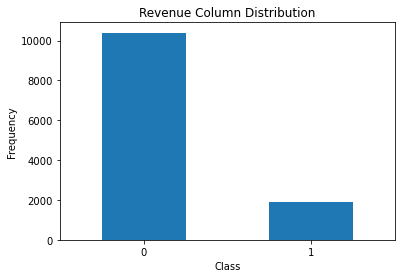

In [33]:
import matplotlib.pyplot as plt 

count_classes = pd.value_counts(df['Revenue'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Revenue Column Distribution")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency")

In [34]:
#applying SMOTE Tomek model to balance data between buyers and not buyers 
from imblearn.combine import SMOTETomek

oversamp_undersamp = SMOTETomek(sampling_strategy=0.6) #default sampling strategy

X_b, y_b = oversamp_undersamp.fit_sample(X, y)

X_b.shape,y_b.shape

((16002, 19), (16002,))

In [35]:
#counting and comparing the original dataset and the balanced one.
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_b)))

Original dataset shape Counter({0: 10399, 1: 1905})
Resampled dataset shape Counter({0: 10081, 1: 5921})


## Reapplying the models

Divide between train and test:

In [36]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.20)

### Logistic regression

In [37]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train_b, y_train_b)
logreg.score(X_test_b,y_test_b)

0.704154951577632

In [38]:
y_pred_logreg_b = logreg.predict(X_test_b)

In [39]:
confusion_matrix(y_test_b, y_pred_logreg_b)

array([[1755,  282],
       [ 665,  499]])

### SVC

In [40]:
svc = SVC()
svc.fit(X_train_b, y_train_b)
svc.score(X_test_b,y_test_b)

0.6669790690409247

In [41]:
y_pred_svc_b = svc.predict(X_test_b)

In [42]:
confusion_matrix(y_test_b, y_pred_svc_b)

array([[1949,   88],
       [ 978,  186]])

### KNN

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(X_train_b, y_train_b)
knn.score(X_test_b,y_test_b)

0.7925648234926586

In [45]:
y_pred_knn_b = knn.predict(X_test_b)

In [46]:
confusion_matrix(y_test_b, y_pred_knn_b)

array([[1577,  460],
       [ 204,  960]])

### Decision tree

In [47]:
tree = DecisionTreeClassifier()
tree.fit(X_train_b, y_train_b)
tree.score(X_test_b, y_test_b)

0.8144329896907216

In [48]:
y_pred_tree_b = tree.predict(X_test_b)

In [50]:
confusion_matrix(y_test_b, y_pred_tree_b)

array([[1748,  289],
       [ 305,  859]])

### Random forest

In [55]:
forest = RandomForestClassifier()
forest.fit(X_train_b, y_train_b)
forest.score(X_test_b, y_test_b)

0.8844111215245236

In [52]:
y_pred_forest_b = forest.predict(X_test_b)

In [54]:
confusion_matrix(y_test_b, y_pred_forest_b)

array([[1953,   84],
       [ 308,  856]])